In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('credit_customers.csv')
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [4]:
df.checking_status.value_counts()

no checking    394
<0             274
0<=X<200       269
>=200           63
Name: checking_status, dtype: int64

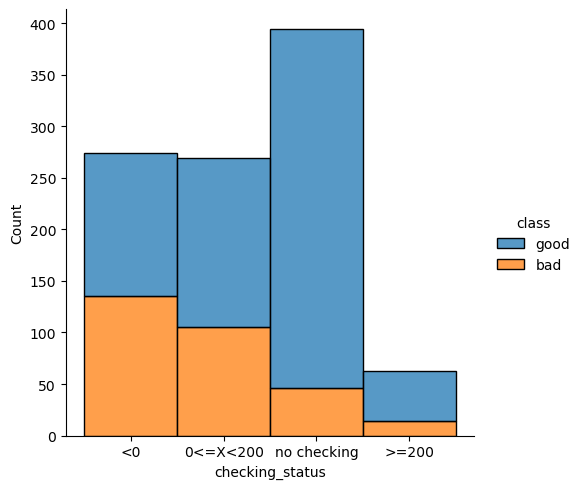

In [5]:
sns.displot(data=df, x='checking_status', hue='class', multiple='stack')

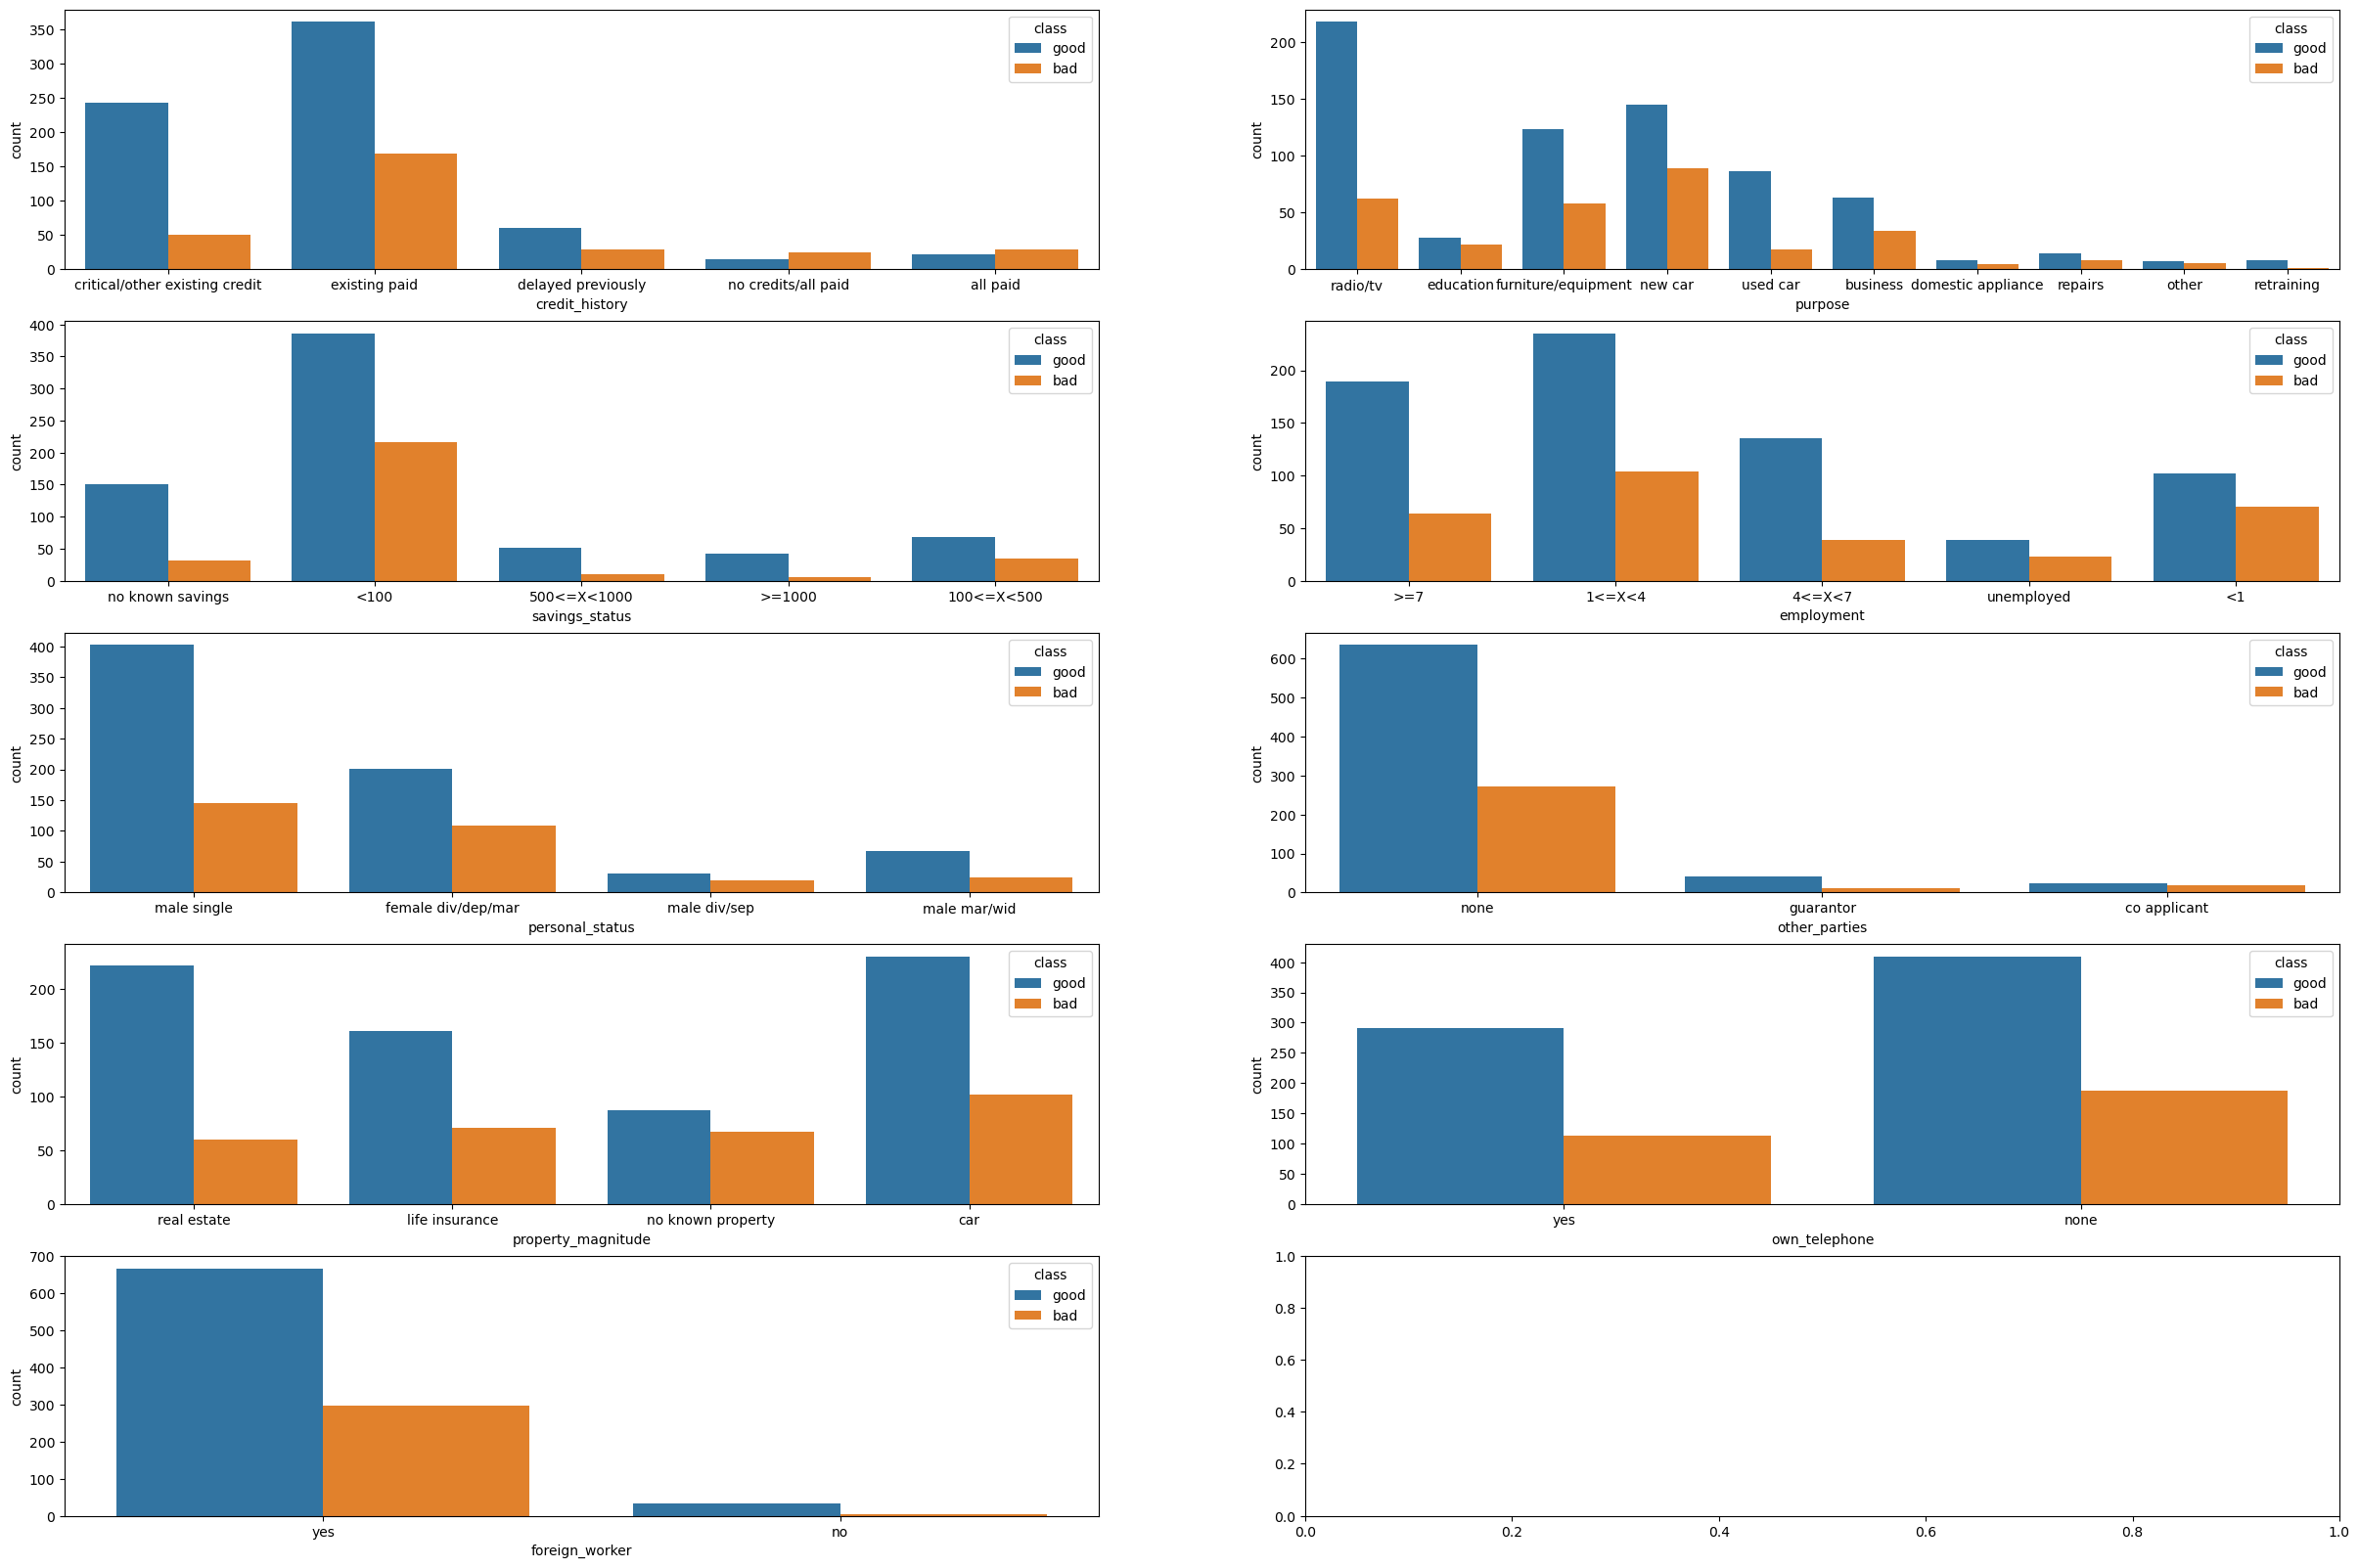

In [6]:
obj = ['credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'own_telephone', 'foreign_worker']

fig, ax = plt.subplots(5, 2, figsize=(30, 20))
ax = ax.flatten()

for (i, a) in enumerate(obj):
    sns.countplot(data=df, x=a, hue='class', ax=ax[i])

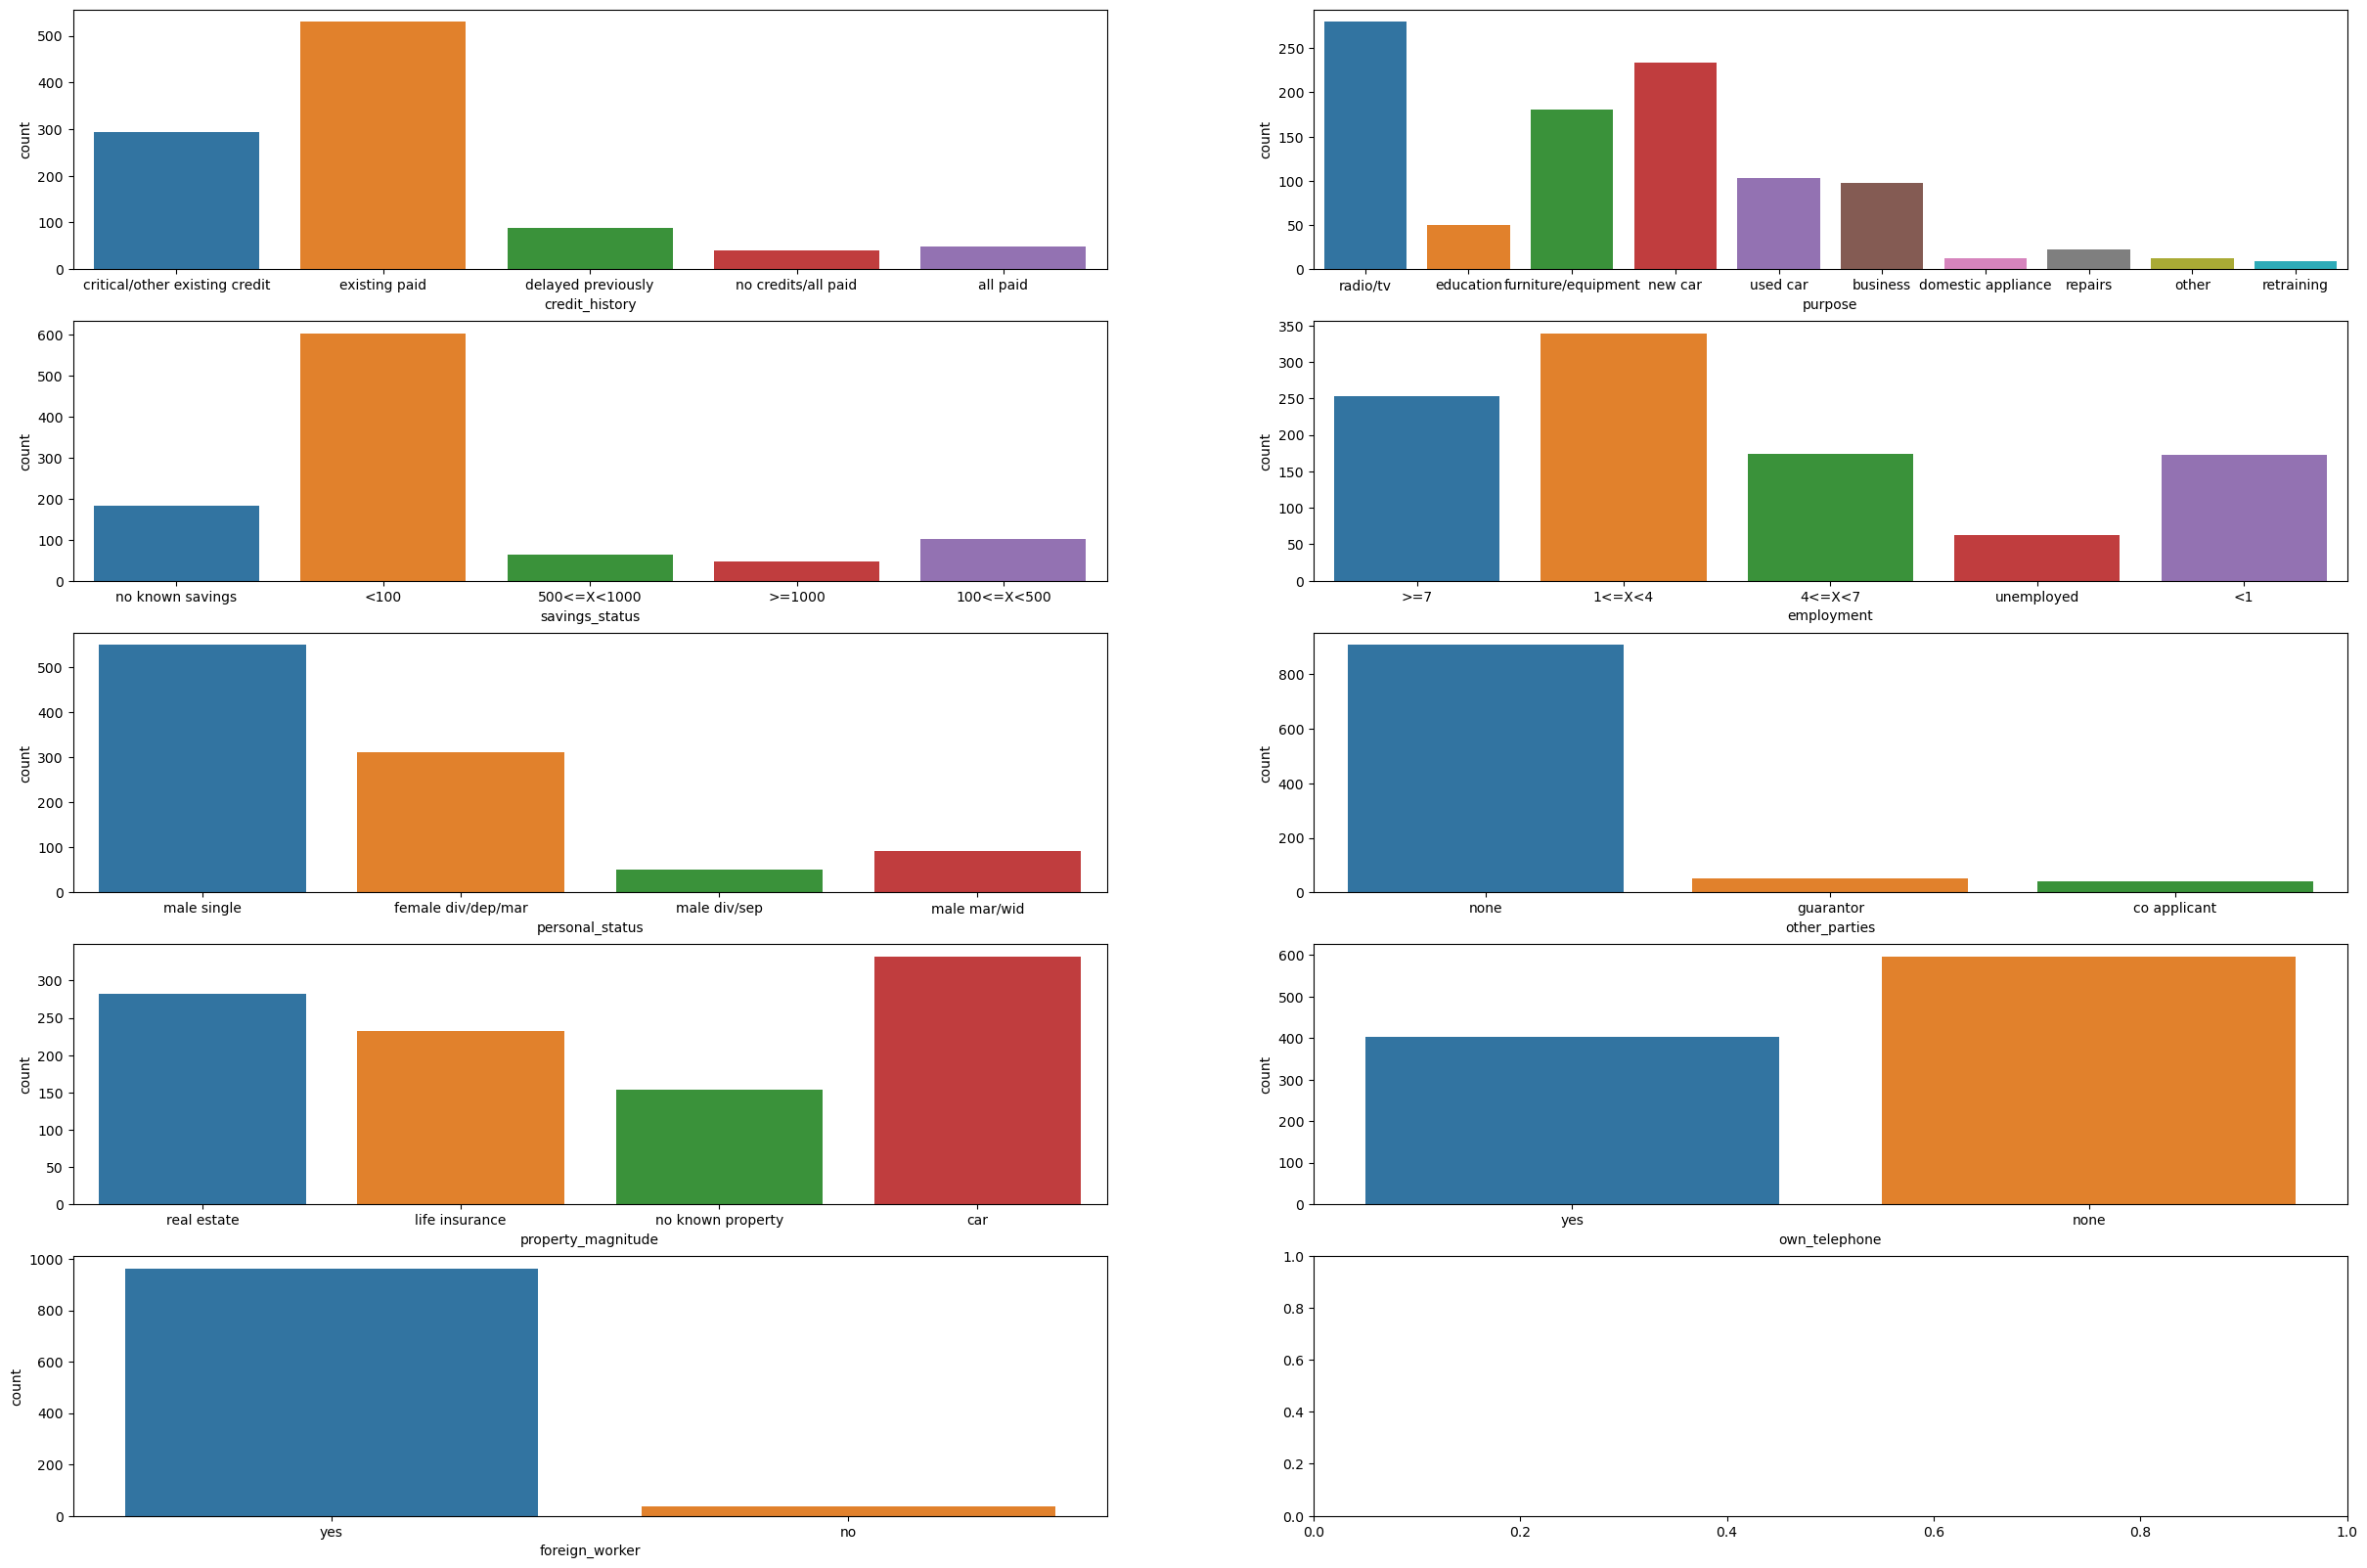

In [7]:
fig, ax = plt.subplots(5, 2, figsize=(30, 20))
ax = ax.flatten()

for (i, a) in enumerate(obj):
    sns.countplot(data=df, x=a, ax=ax[i])

In [8]:
df.credit_history.value_counts()

existing paid                     530
critical/other existing credit    293
delayed previously                 88
all paid                           49
no credits/all paid                40
Name: credit_history, dtype: int64

In [9]:
df.purpose.value_counts()

radio/tv               280
new car                234
furniture/equipment    181
used car               103
business                97
education               50
repairs                 22
domestic appliance      12
other                   12
retraining               9
Name: purpose, dtype: int64

In [10]:
df.savings_status.value_counts()

<100                603
no known savings    183
100<=X<500          103
500<=X<1000          63
>=1000               48
Name: savings_status, dtype: int64

In [11]:
df.other_parties.value_counts()

none            907
guarantor        52
co applicant     41
Name: other_parties, dtype: int64

# Conclusions from viz

- **other_parties** column is mostly None so should remove it
- combine no credits/all paid and all paid in **credit_history**
- put the low count labels in other in **purpose**
- May seperate genders and marital status.
- The ratio between good and bad class for person with no property is much lower for people with no property

In [12]:
df.drop('other_parties', inplace=True, axis=1)
df.loc[df[df.credit_history == 'all paid'].index, 'credit_history'] = 'no credits/all paid'
df.loc[df[(df.purpose == 'domestic appliance') | (df.purpose == 'repairs') | (df.purpose == 'retraining')].index, 'purpose'] = 'other'

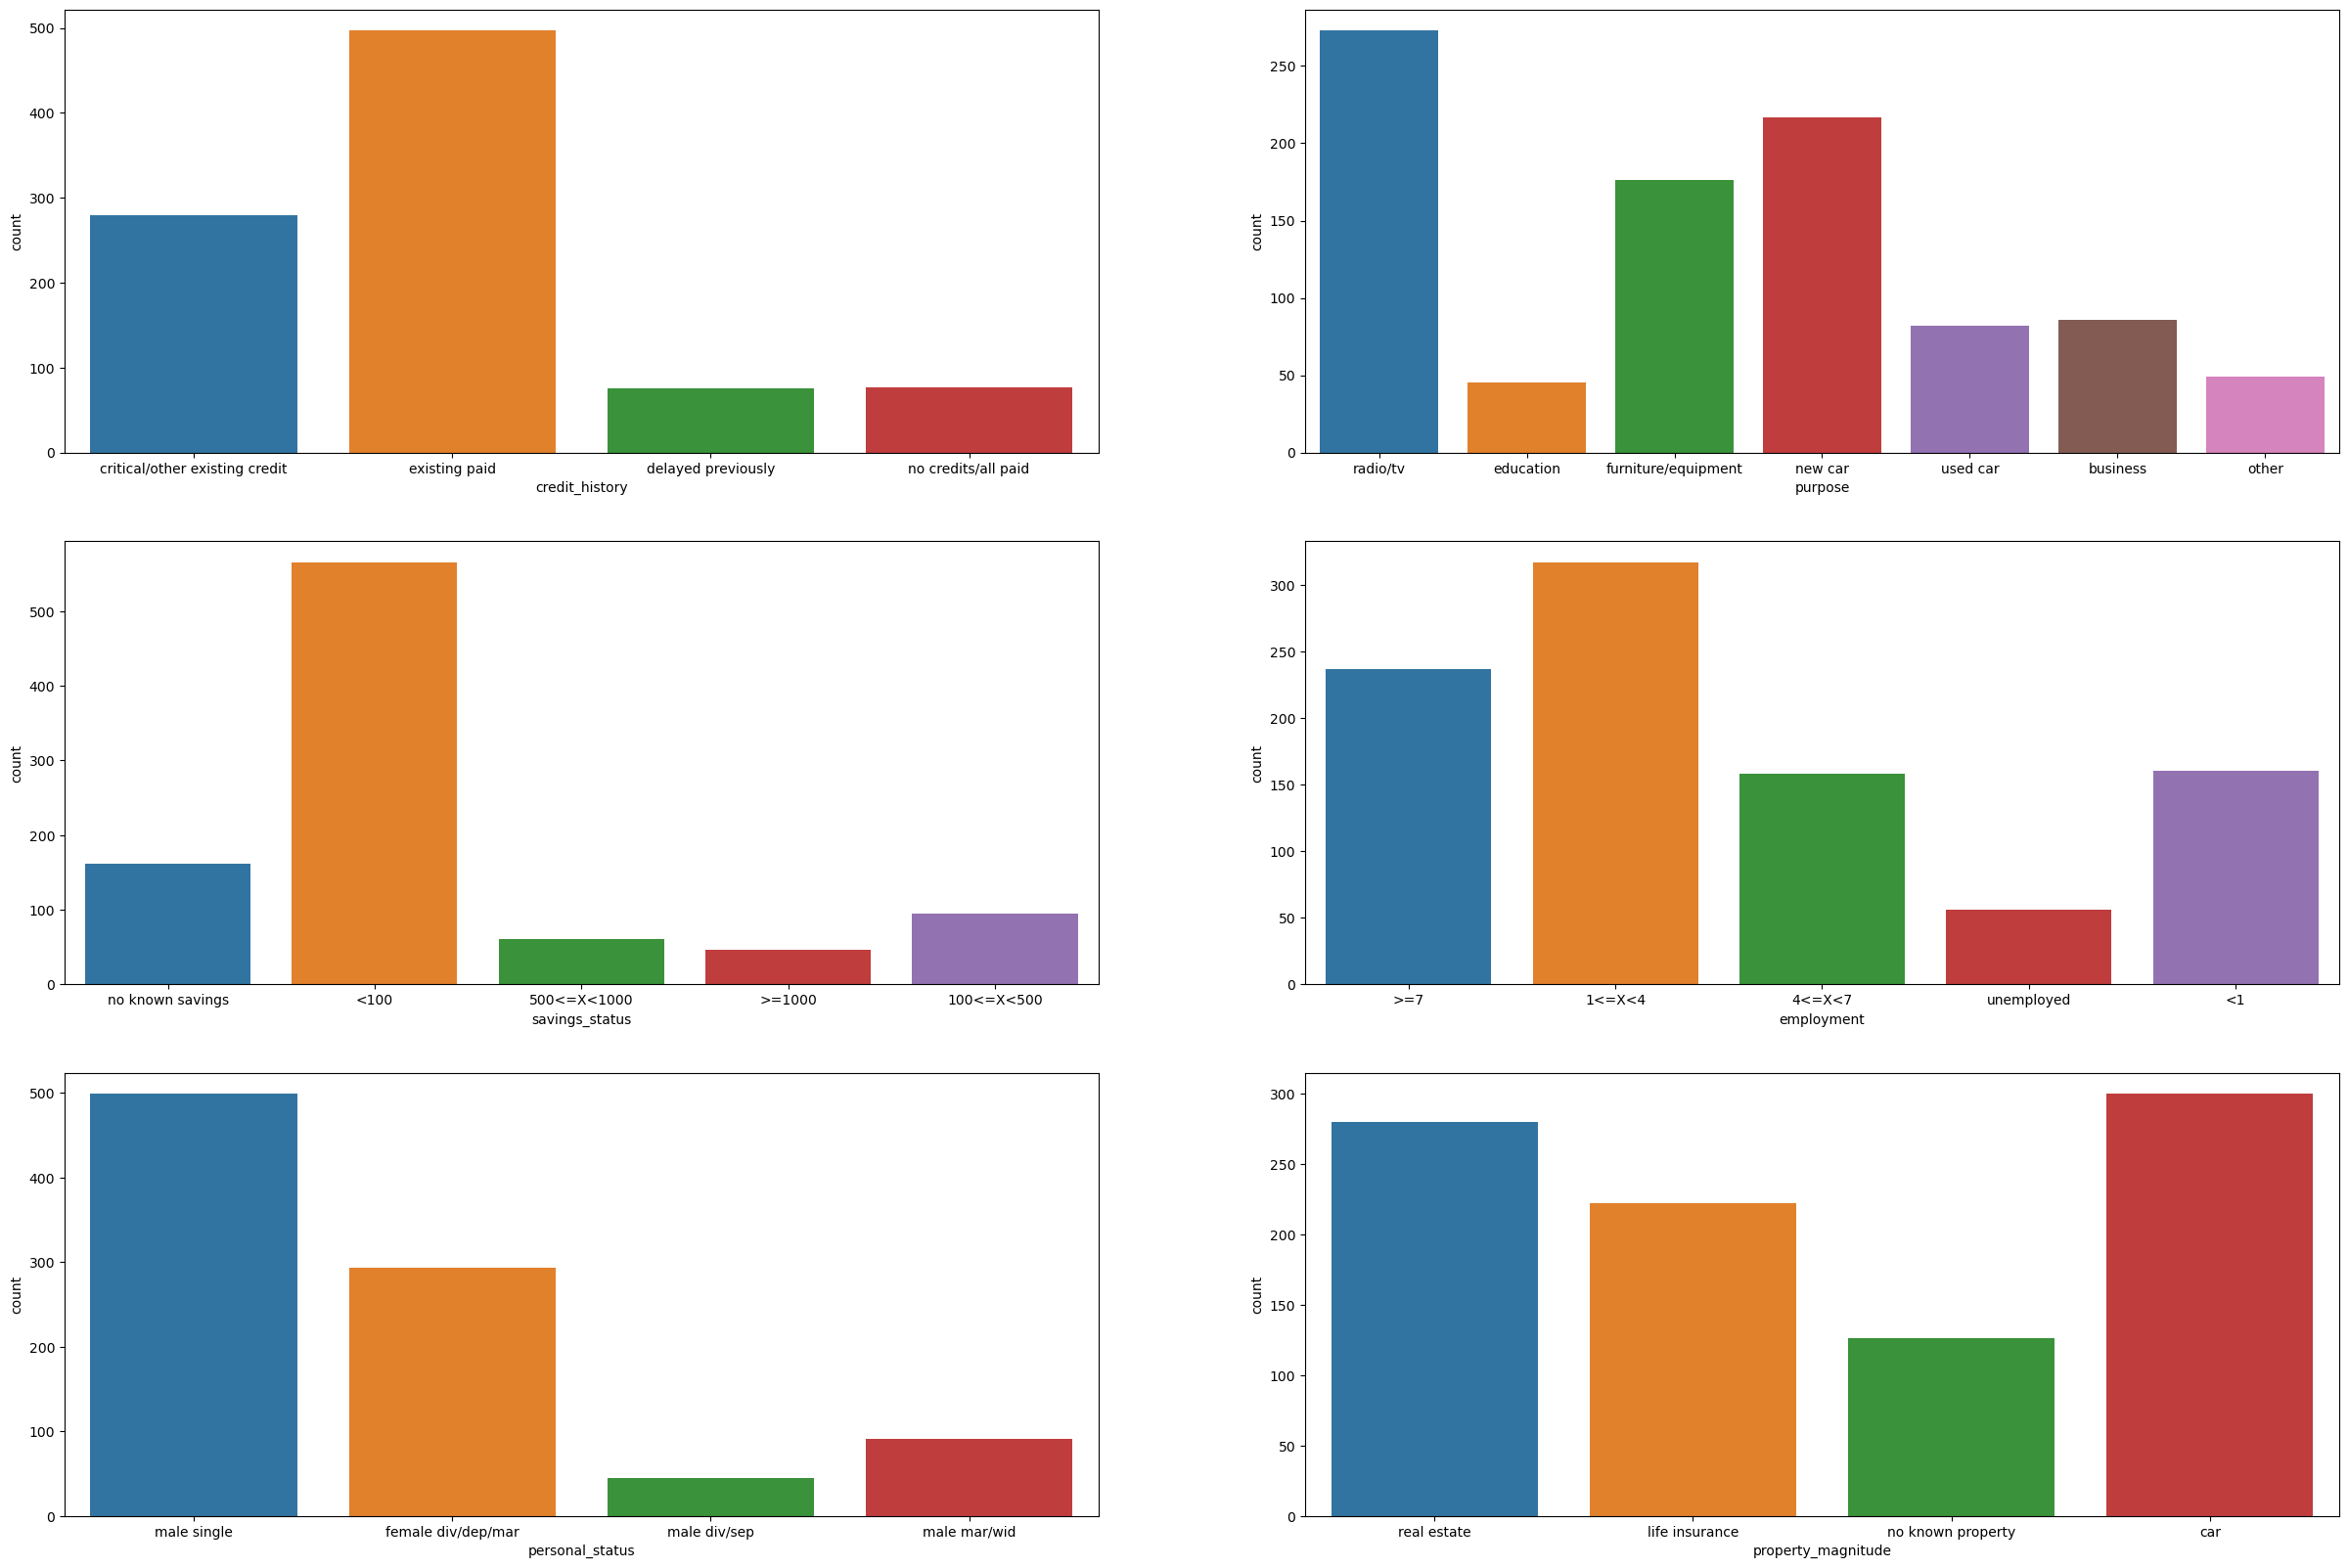

In [37]:
fig, ax = plt.subplots(3, 2, figsize=(30, 20))
ax = ax.flatten()

for (i, a) in enumerate(['credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'property_magnitude']):
    sns.countplot(data=df, x=a, ax=ax[i])


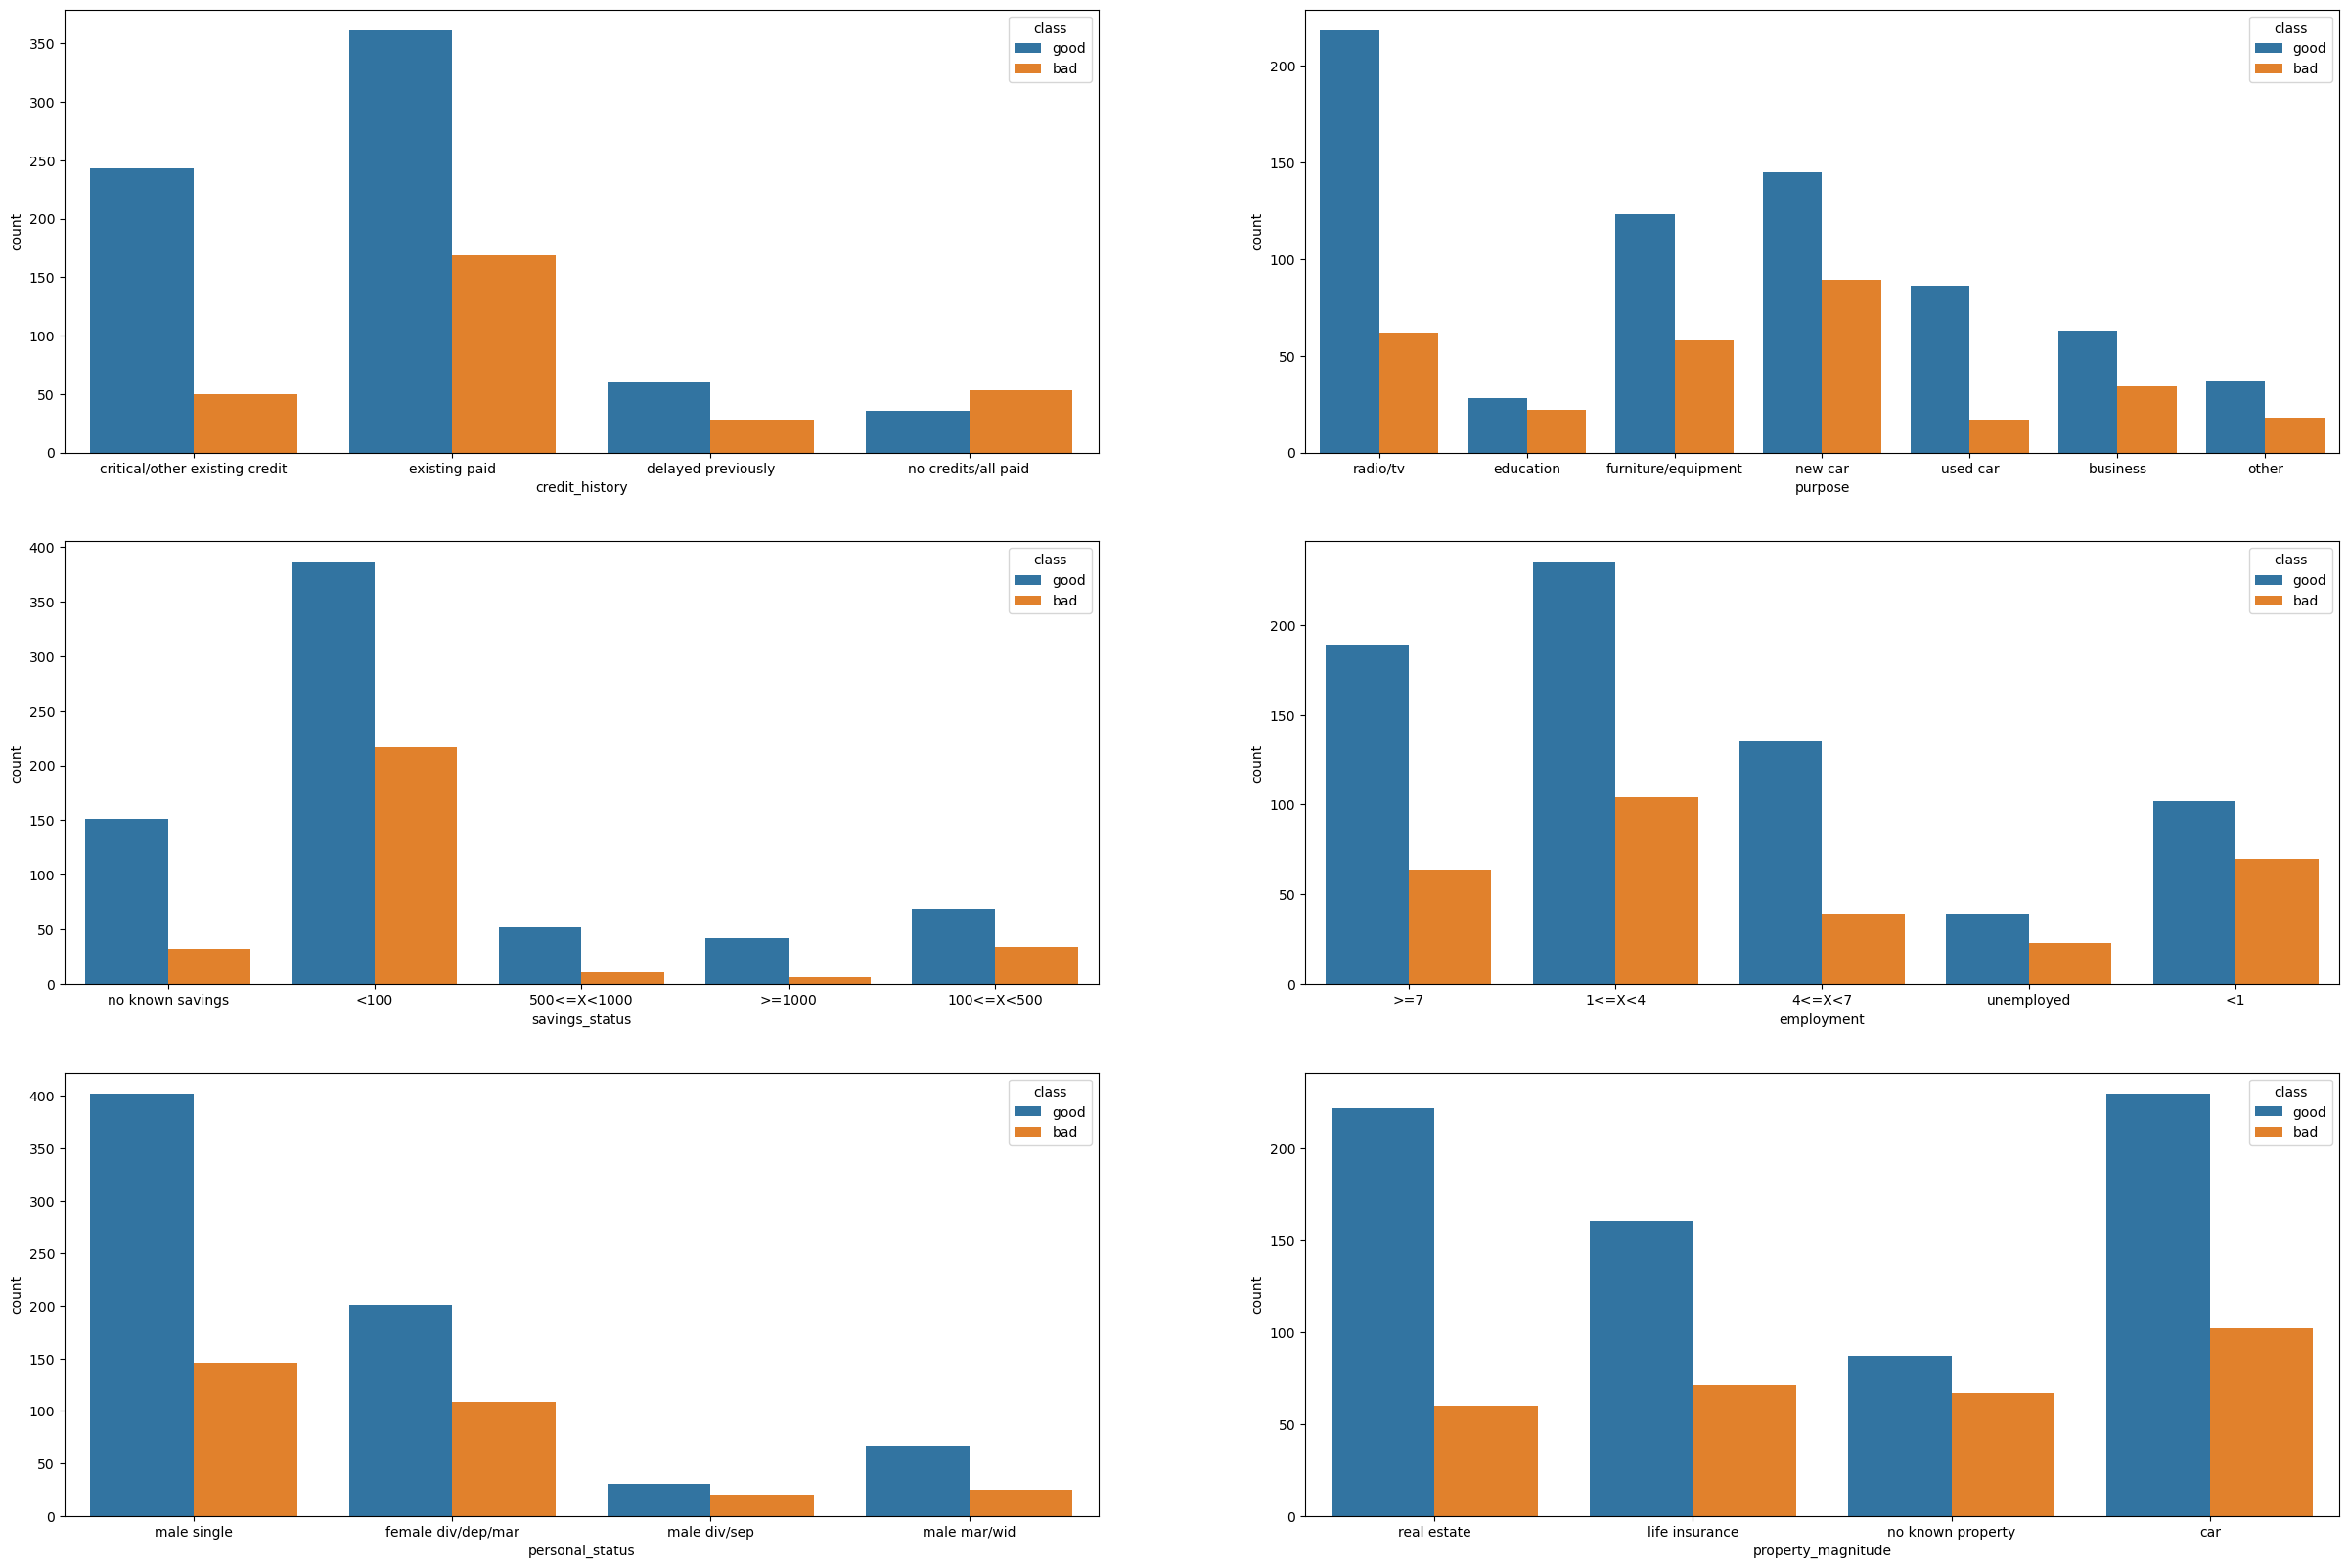

In [14]:
fig, ax = plt.subplots(3, 2, figsize=(30, 20))
ax = ax.flatten()

for (i, a) in enumerate(['credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'property_magnitude']):
    sns.countplot(data=df, x=a, hue='class', ax=ax[i])


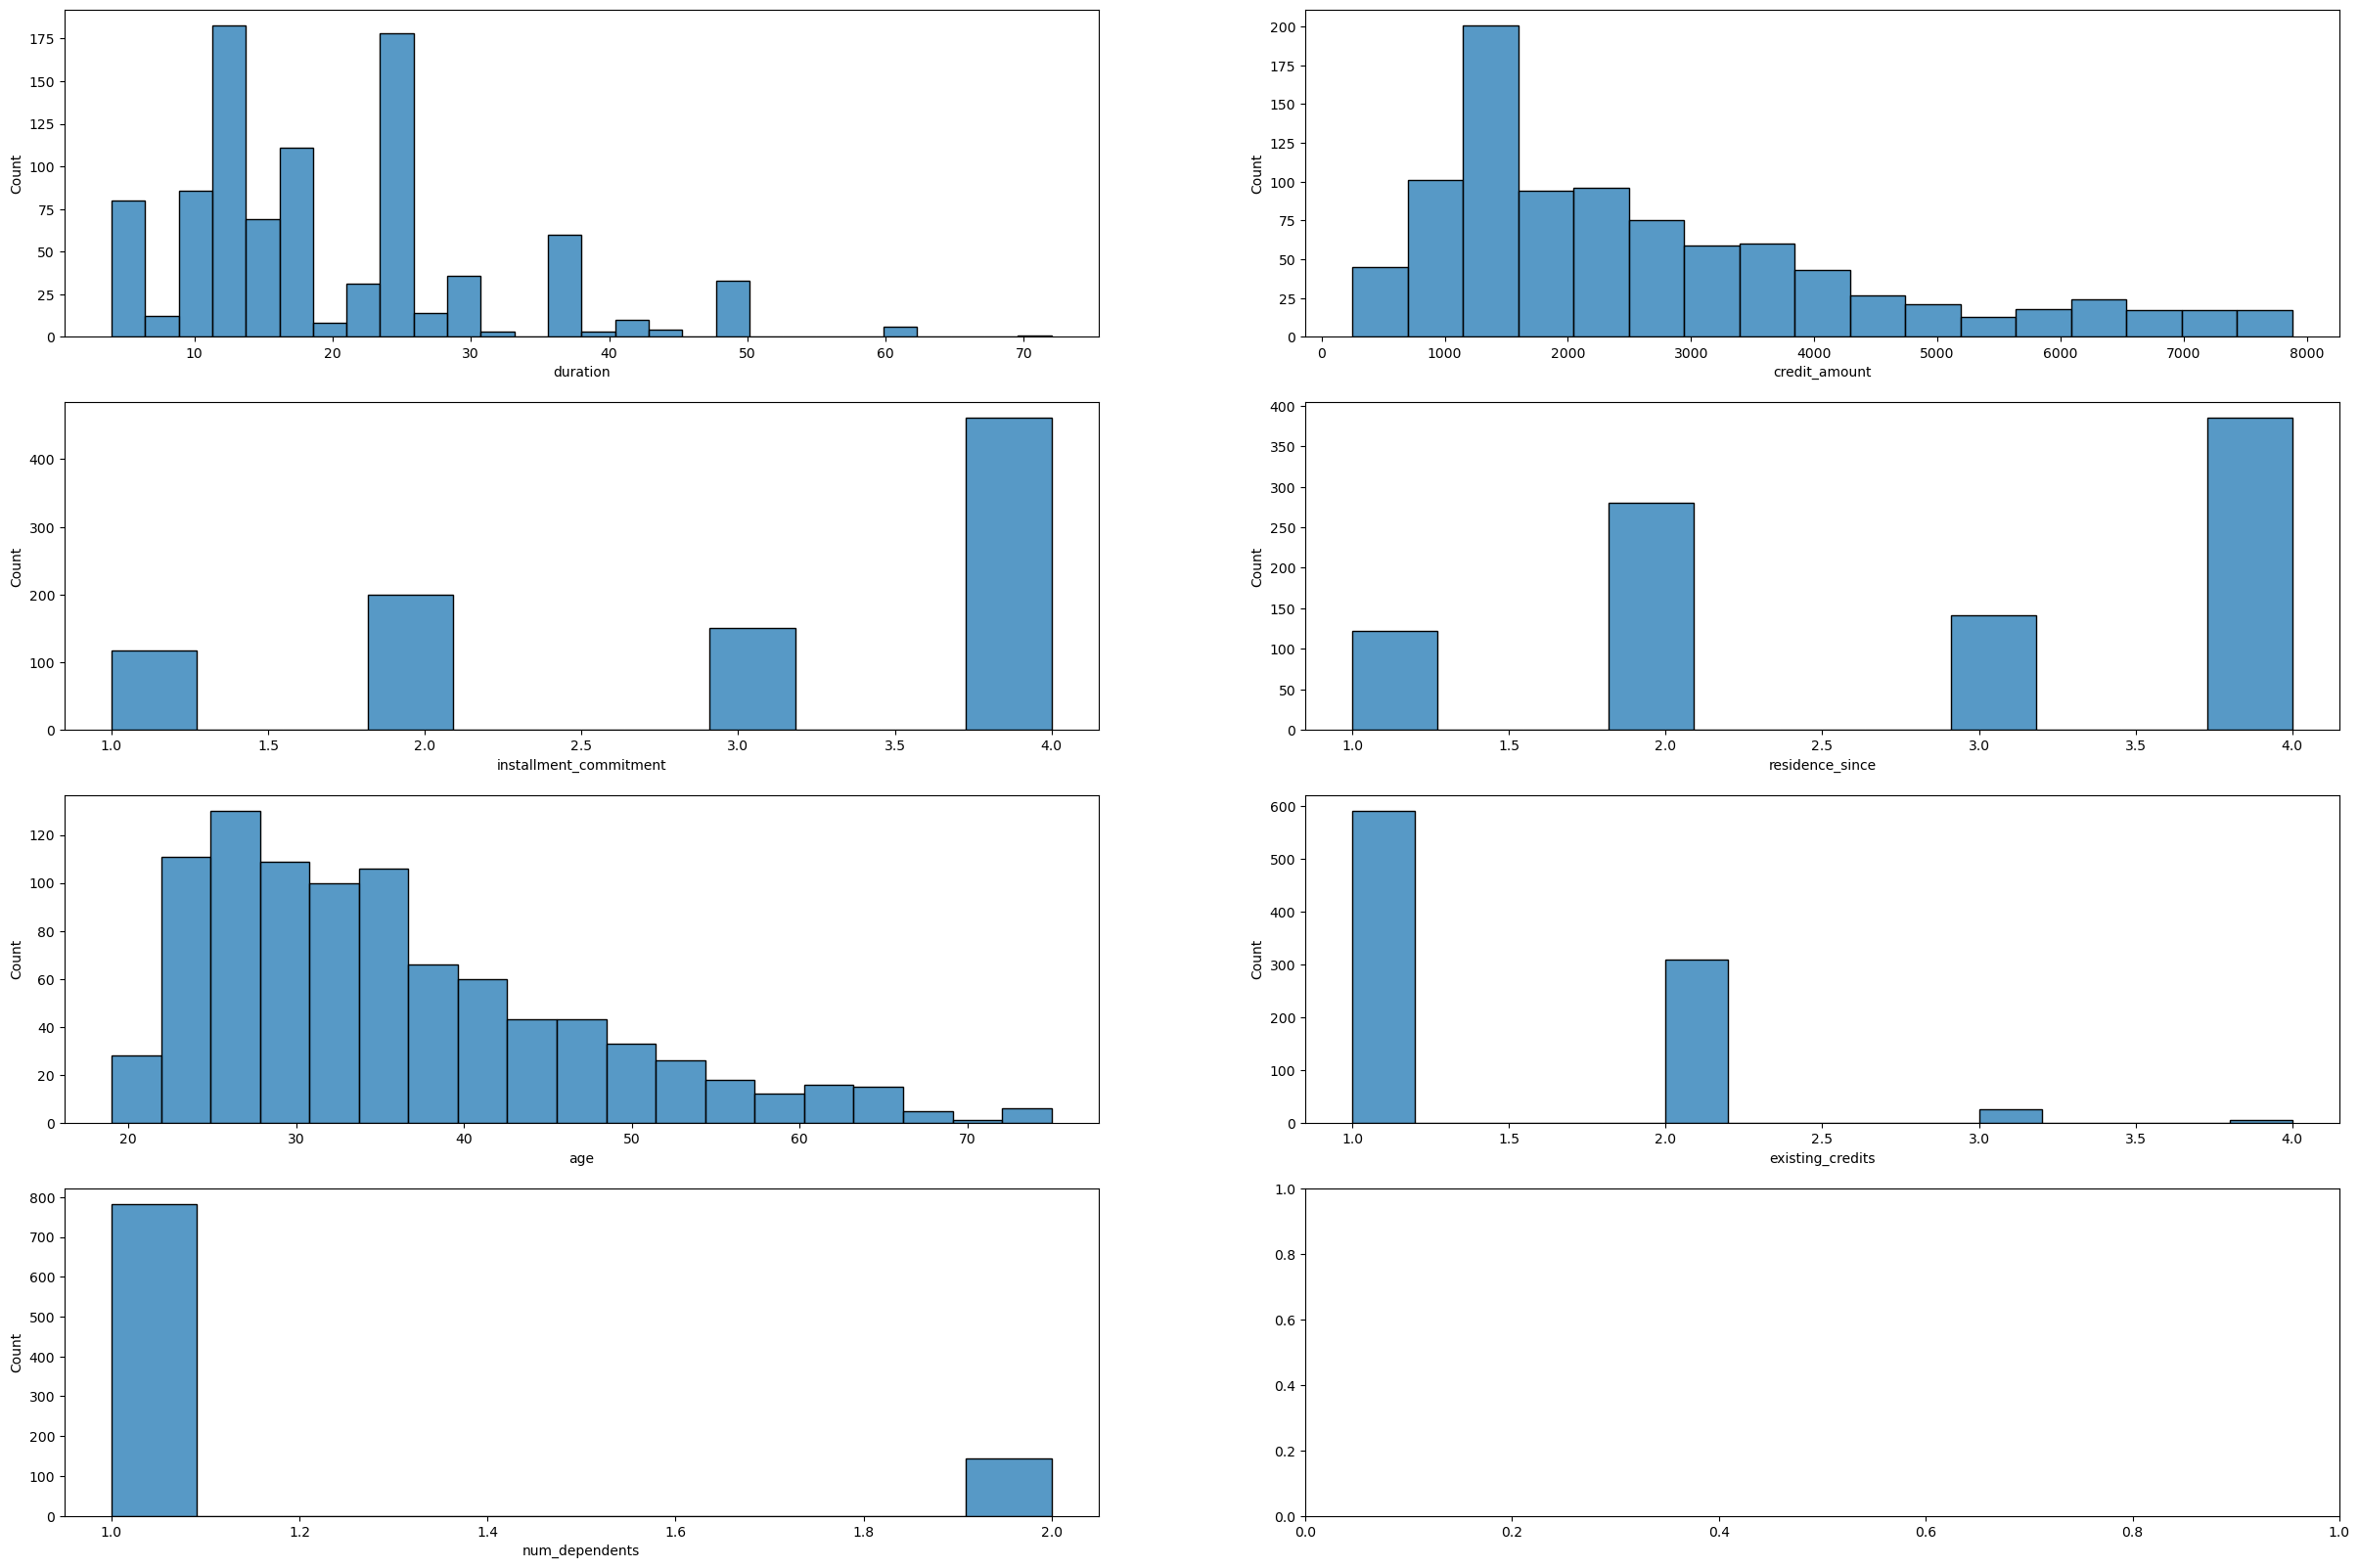

In [36]:
flt = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
ax = ax.flatten()

for i, a in enumerate(flt):
    sns.histplot(df, x=a, ax=ax[i])

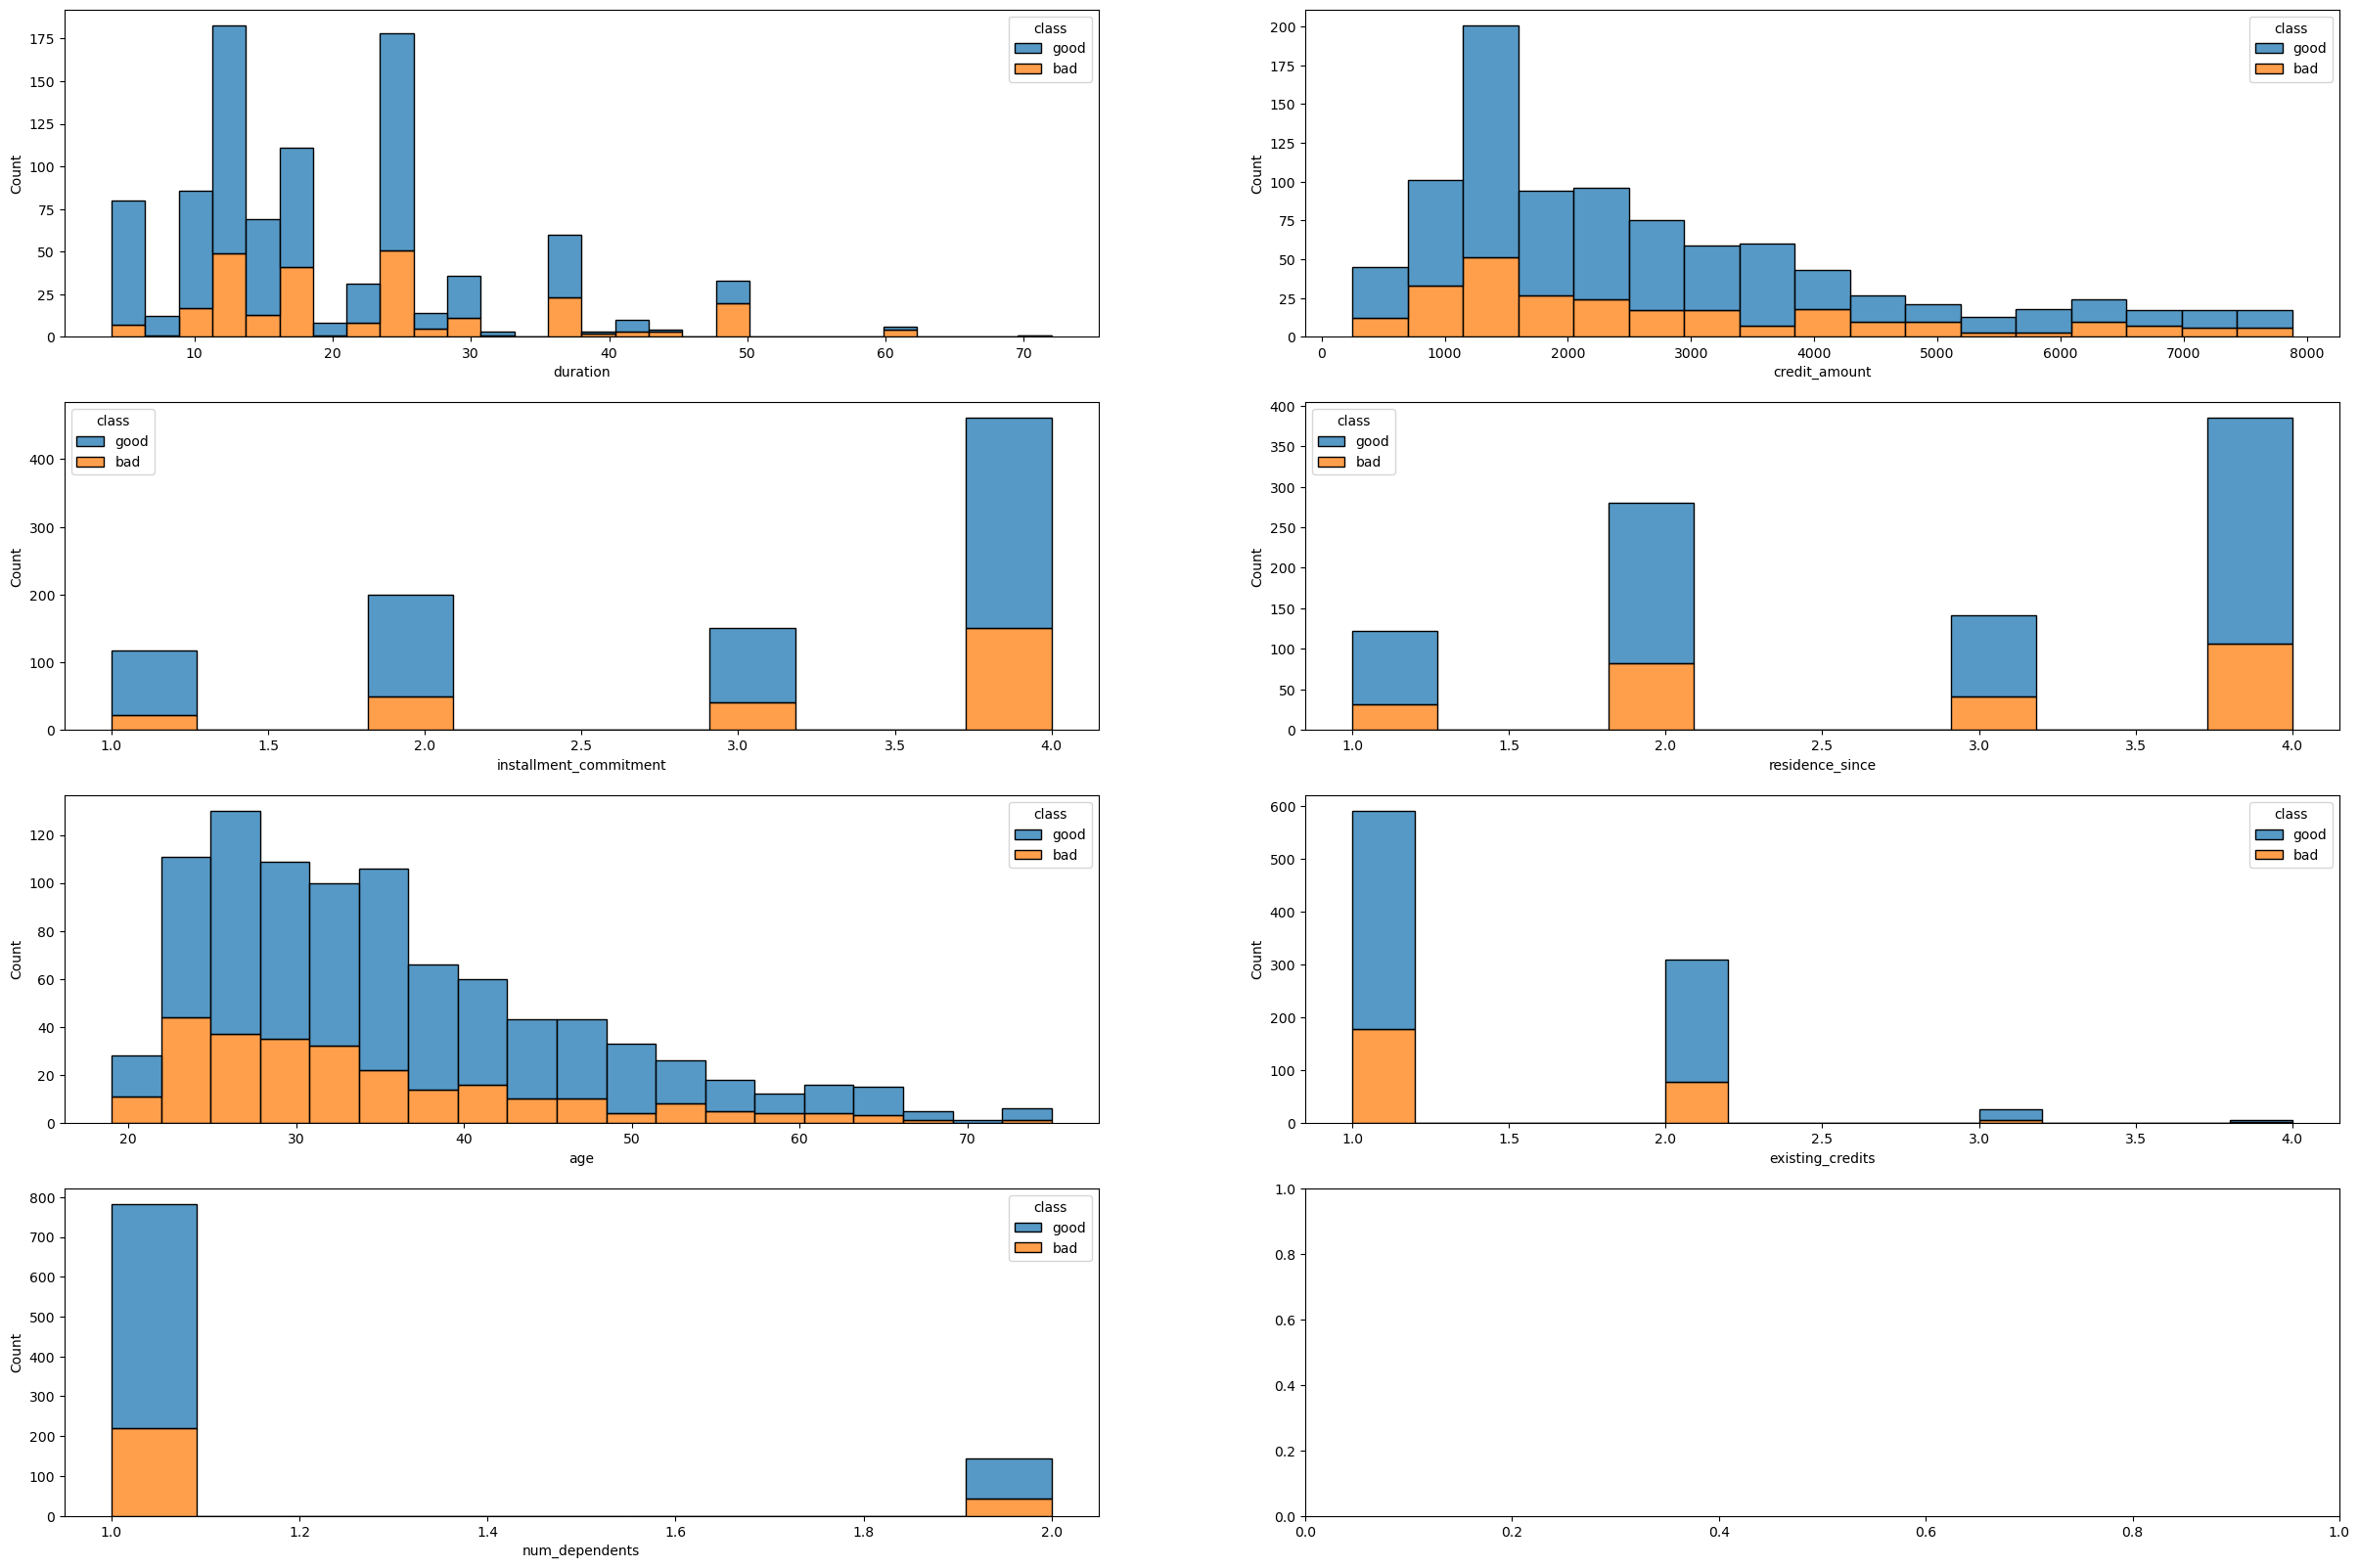

In [35]:
flt = ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

fig, ax = plt.subplots(4, 2, figsize=(30, 20))
ax = ax.flatten()

for i, a in enumerate(flt):
    sns.histplot(df, x=a, ax=ax[i], hue='class', multiple='stack')

<Axes: >

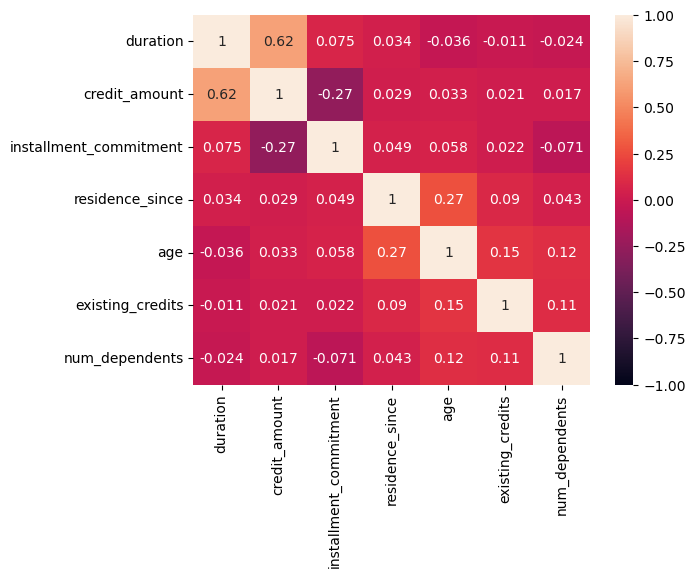

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, vmax=1, vmin=-1,)

In [18]:
df.installment_commitment = df.installment_commitment.astype(int)
df.residence_since = df.residence_since.astype(int)
df.num_dependents = df.num_dependents.astype(int)
df.existing_credits = df.existing_credits.astype(int)

**no credits/all paid** has more bad credit than good. Should look into if it is just because of random variation or if another variable is influencing it

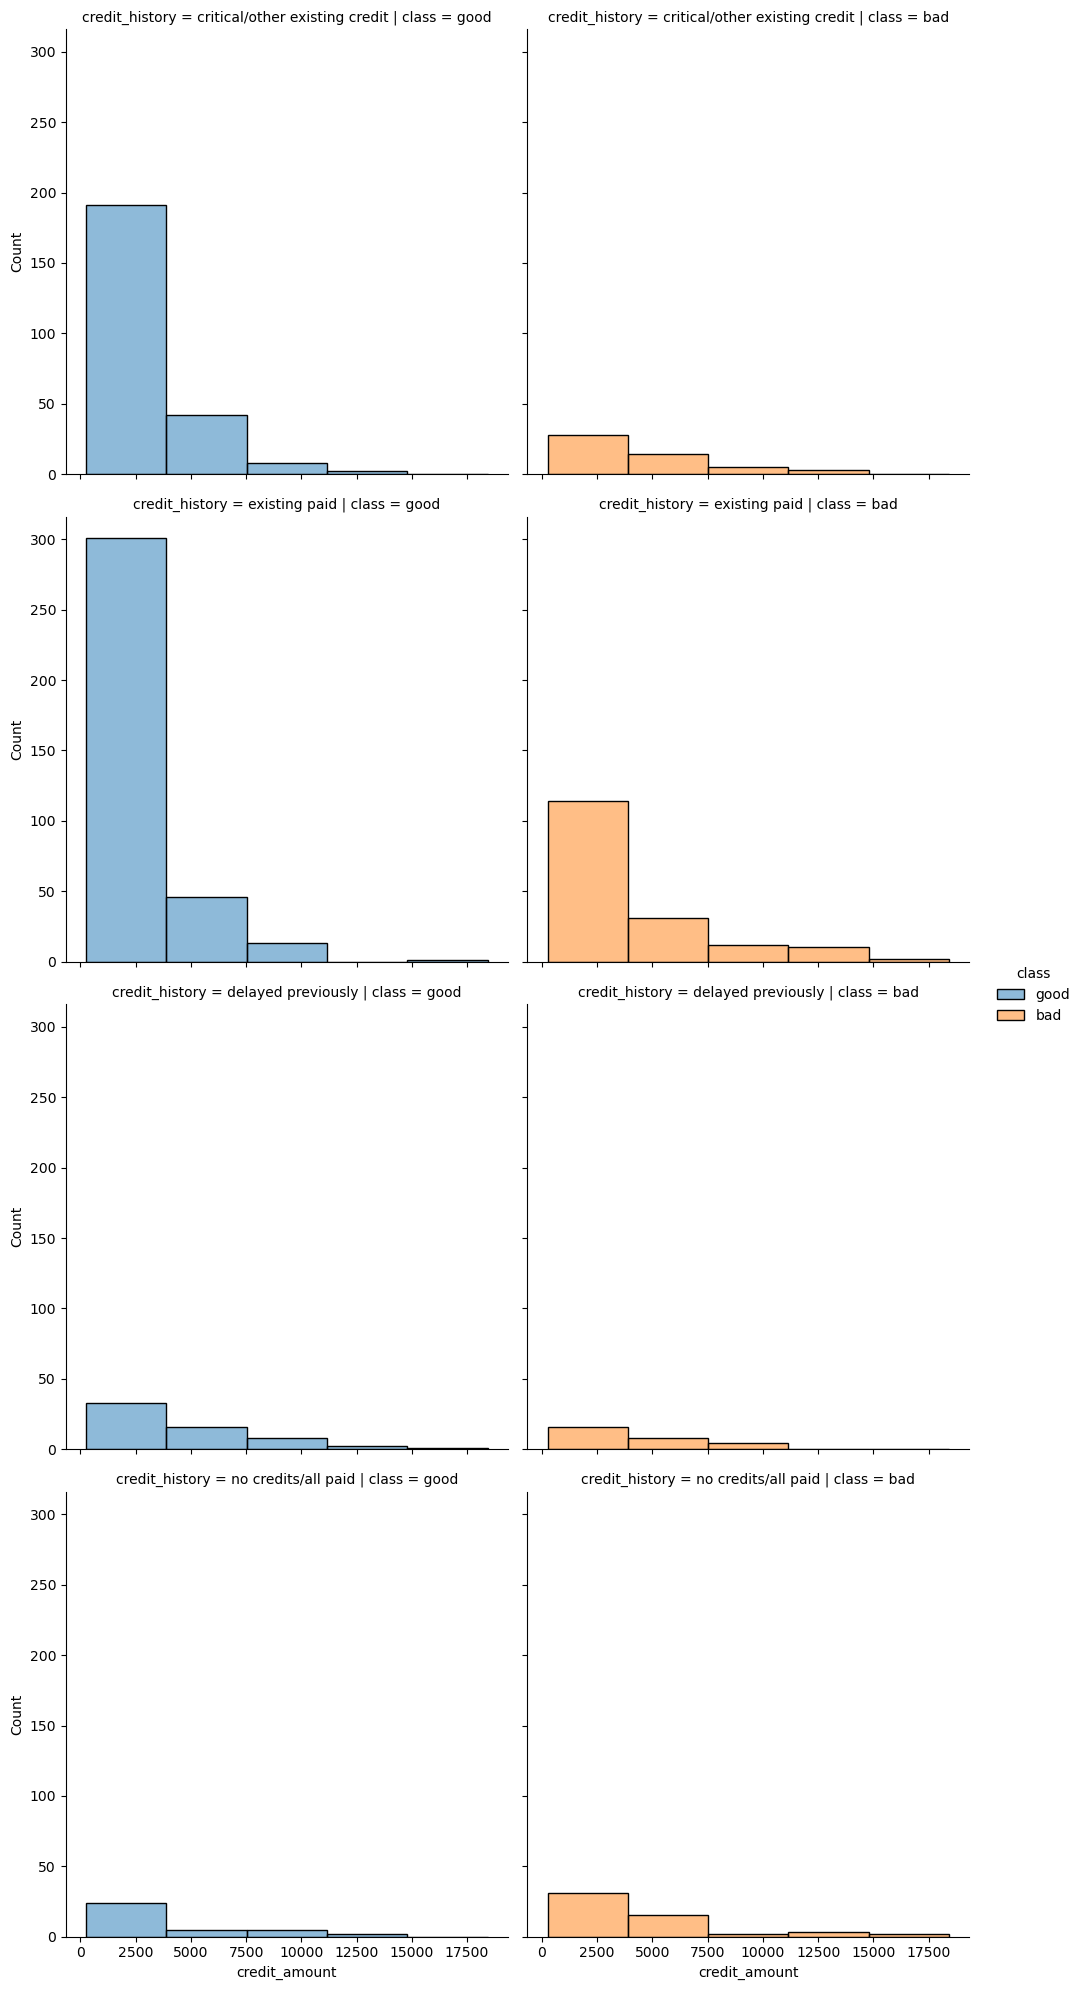

In [19]:
sns.displot(data=df, x='credit_amount', hue='class', row='credit_history', col='class', bins=5)

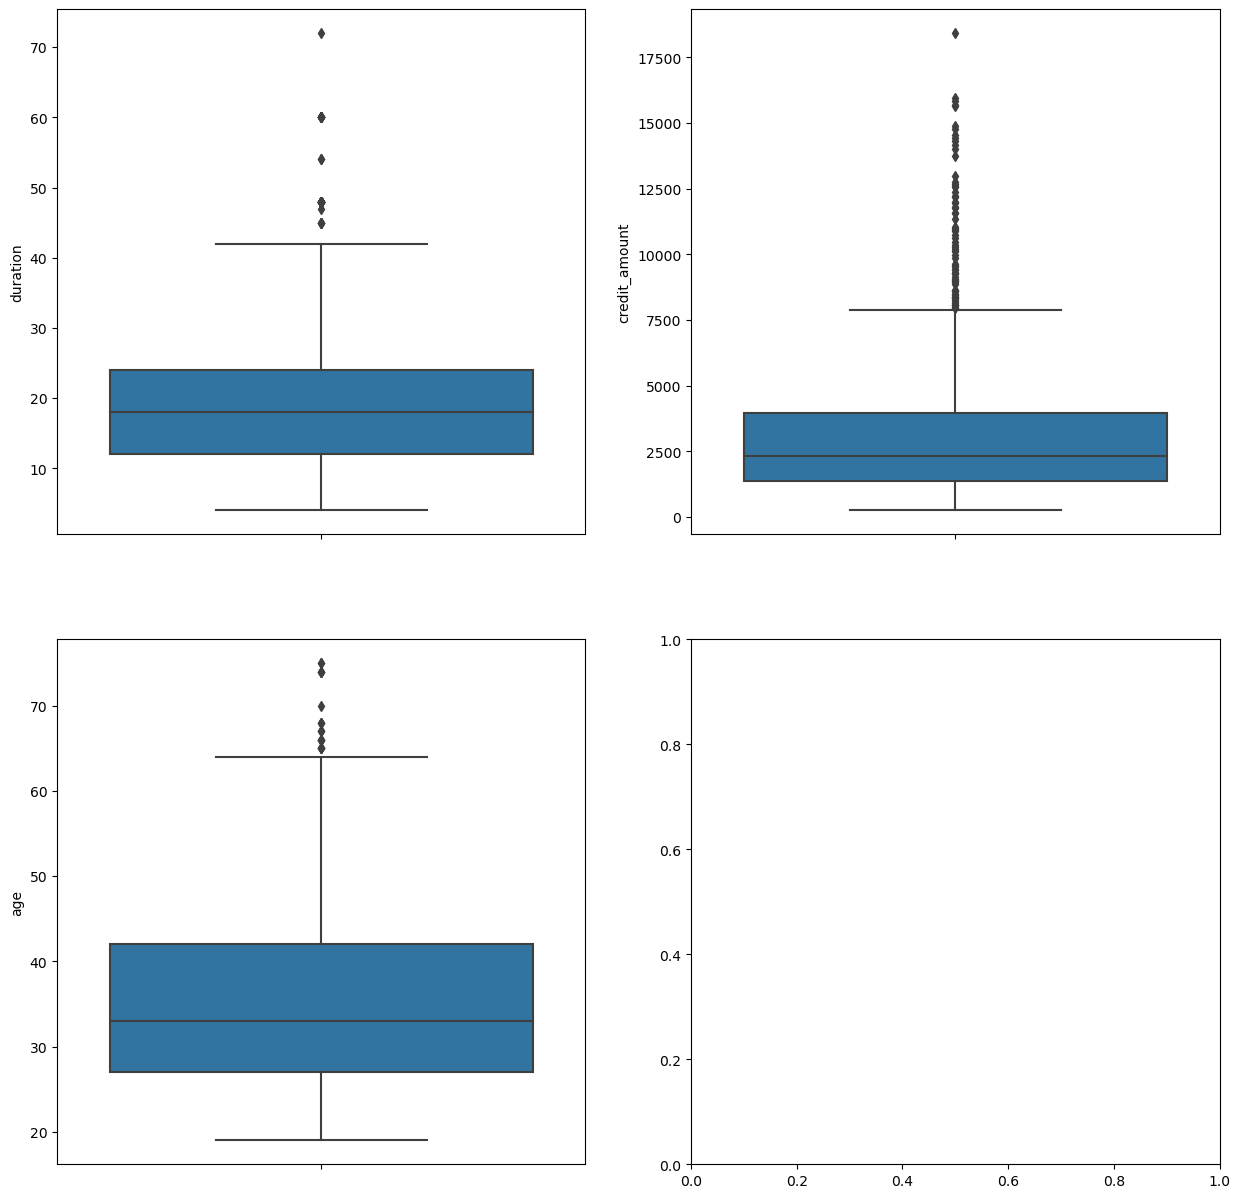

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax = ax.flatten()

for i, a in enumerate(['duration', 'credit_amount', 'age']):
    sns.boxplot(df, y=a, ax=ax[i], hue='class')

In [32]:
credit_amount_outlier_thres = df.credit_amount.quantile(0.75) + (df.credit_amount.quantile(0.75) - df.credit_amount.quantile(0.25)) * 1.5
df.drop(df[df['credit_amount'] > credit_amount_outlier_thres].index, inplace=True)

<Axes: xlabel='credit_amount'>

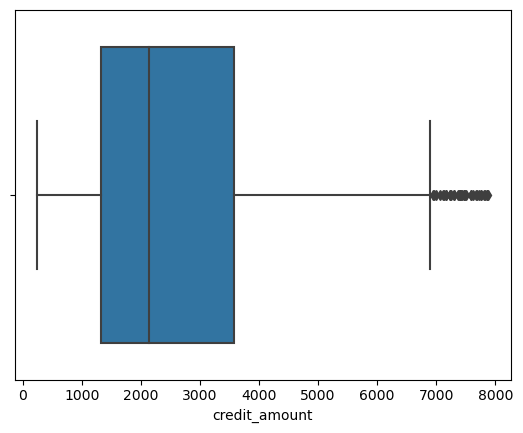

In [33]:
sns.boxplot(df, x='credit_amount')

In [34]:
df.shape

(928, 20)

In [38]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,4,real estate,67.0,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,2,real estate,22.0,none,own,1,skilled,1,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,3,real estate,49.0,none,own,1,unskilled resident,2,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,4,life insurance,45.0,none,for free,1,skilled,2,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,4,no known property,53.0,none,for free,2,skilled,2,none,yes,bad


In [40]:
df.to_csv('credit_customers_clean.csv', index=False)